In [4]:
import gspread

gc = gspread.service_account(filename='./oauth.json')
print("Login successful")

Login successful


In [5]:
import pandas as pd
from src.tournament import Table, Player

worksheet = gc.open('tournament sheet').worksheet("Data")

games = pd.DataFrame.from_records(worksheet.get("B2:E210"))

players = {}

def get_or_make_player(name):
    player = players.get(name, Player(name))
    players[name] = player
    return player

# Convert player strings to player objects
games = games.applymap(get_or_make_player)
# Create a table for each row.
games = games.apply(lambda game: Table(players=game), axis=1)

print(f'Tables = {games.shape[0]}, Players = {len(players)}')

Tables = 209, Players = 19


In [6]:
import matplotlib.pyplot as plt


def update_player_histories(table):
    for player in table:
        player.play_table(table)

def get_cost(players):
    square_cost = 0
    max_cost = 0
    min_cost = 0

    for player in players.values():
        square_cost += player.cost()
        max_cost += player.flat_cost()
        min_cost += player.min_cost(len(players))


    return [square_cost, max_cost, min_cost]

def update_history_and_get_cost(table):
    update_player_histories(table)
    return get_cost(players)

# Play each table so player histories is populated. Also get the cost after each game.
costs = pd.DataFrame.from_records(games.apply(update_history_and_get_cost))
costs = costs.rename(columns={0: "cost", 1: "max cost", 2: "min cost"})

## Cost growth

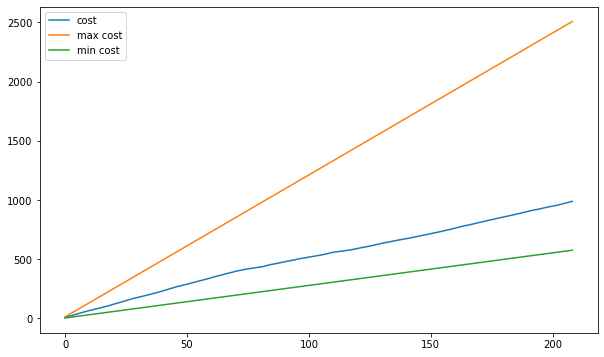

In [7]:
costs.plot.line(figsize=(10,6))
plt.show()

## Cost growth - log scale

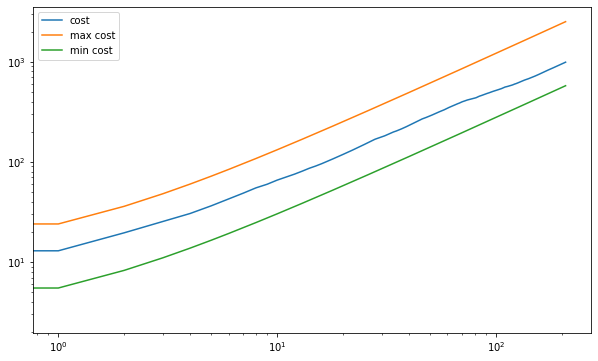

In [8]:
costs.plot.line(figsize=(10,6), loglog=True)
plt.show()

In [9]:
from src.tabu_search import tabu_search

result = tabu_search(list(players.values()), 4)
print(result.cost())


138.95095808417588
